In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import eli5

from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

file_path_may = "..."
file_path_june = "..."
file_path_jan = "..."


In [3]:
#Wczytanie plików z CSV do df
df_may=pd.read_csv(file_path_may)
del df_may["Unnamed: 0"]
df_may.head(7)

df_june=pd.read_csv(file_path_june)
del df_june["Unnamed: 0"]
df_june.head(7)

print(df_june.head(1))

'''
df_may.plot(figsize=(25,9))
plt.title("Dane May")
df_june.plot(figsize=(25,9))
plt.title("Dane June")
'''

              Datetime  SA DPT  SA Temp  RA DPT  SA %RH  RA Temp  RA Humidity  \
0  2022-06-01 00:03:19    14.2     15.2    16.2    94.1     23.7         63.1   

   Unit Status  
0            1  


'\ndf_may.plot(figsize=(25,9))\nplt.title("Dane May")\ndf_june.plot(figsize=(25,9))\nplt.title("Dane June")\n'

Rozmiar z duplikatami:  (2868, 7)
Rozmiar bez duplikatów:  (2472, 7)


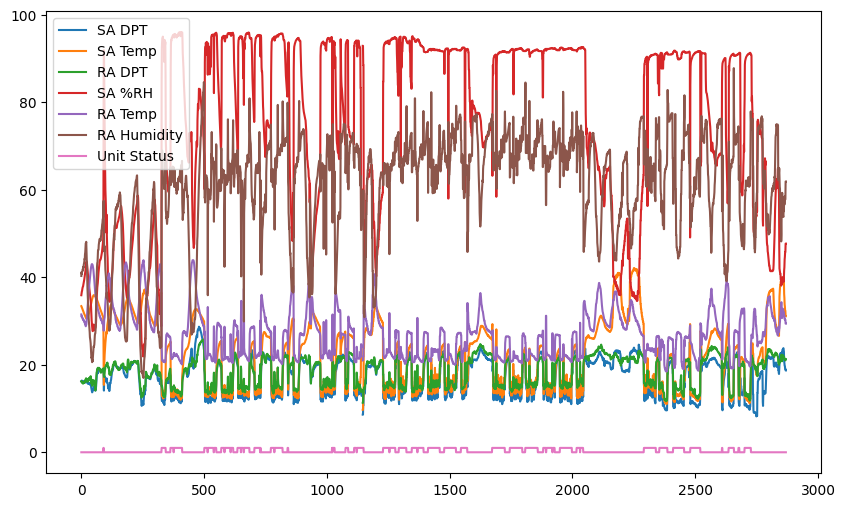

In [4]:
#polaczenie df i usuwanie niechcianych elementow
df = pd.concat([df_may, df_june], ignore_index=True)
df.plot(figsize=(10, 6))
df.dropna(subset=['SA DPT'], inplace=True)
mean_value = df['SA DPT'].mean()
df['SA DPT'].fillna(mean_value, inplace=True)
df.set_index('Datetime',inplace=True)
print('Rozmiar z duplikatami: ', df.shape)
df.drop_duplicates(inplace=True)
print('Rozmiar bez duplikatów: ', df.shape)
X = df[[ 'SA DPT', 'SA Temp', 'RA DPT', 'SA %RH', 'RA Humidity']]
y=df['Unit Status']



In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

value_counts = pd.Series(y_pred).value_counts()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nDokładność modelu: {accuracy}")
print(f"Precyzja: {precision}")
print(f"Czułość: {recall}")
print(f"F1 Score: {f1}")
print("Liczba odpowiedzi 1:", value_counts[1])
print("Liczba odpowiedzi 0:", value_counts[0])


Dokładność modelu: 0.9434343434343434
Precyzja: 0.907608695652174
Czułość: 0.9382022471910112
F1 Score: 0.9226519337016575
Liczba odpowiedzi 1: 184
Liczba odpowiedzi 0: 311


In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


value_counts = pd.Series(y_pred).value_counts()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nDokładność modelu: {accuracy}")
print(f"Precyzja: {precision}")
print(f"Czułość: {recall}")
print(f"F1 Score: {f1}")
print("Liczba odpowiedzi 1:", value_counts[1])
print("Liczba odpowiedzi 0:", value_counts[0])


Dokładność modelu: 0.9414141414141414
Precyzja: 0.9027027027027027
Czułość: 0.9382022471910112
F1 Score: 0.9201101928374654
Liczba odpowiedzi 1: 185
Liczba odpowiedzi 0: 310


In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

value_counts = pd.Series(y_pred).value_counts()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nDokładność modelu: {accuracy}")
print(f"Precyzja: {precision}")
print(f"Czułość: {recall}")
print(f"F1 Score: {f1}")
print("Liczba odpowiedzi 1:", value_counts[1])
print("Liczba odpowiedzi 0:", value_counts[0])


Dokładność modelu: 0.9454545454545454
Precyzja: 0.9081081081081082
Czułość: 0.9438202247191011
F1 Score: 0.9256198347107438
Liczba odpowiedzi 1: 185
Liczba odpowiedzi 0: 310


In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = RobustScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

value_counts = pd.Series(y_pred).value_counts()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nDokładność modelu: {accuracy}")
print(f"Precyzja: {precision}")
print(f"Czułość: {recall}")
print(f"F1 Score: {f1}")
print("Liczba odpowiedzi 1:", value_counts[1])
print("Liczba odpowiedzi 0:", value_counts[0])


Dokładność modelu: 0.9434343434343434
Precyzja: 0.907608695652174
Czułość: 0.9382022471910112
F1 Score: 0.9226519337016575
Liczba odpowiedzi 1: 184
Liczba odpowiedzi 0: 311


In [9]:
#BEZ Normalizacji
split_index = int(0.8 * len(X))

X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

value_counts = pd.Series(y_pred).value_counts()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nDokładność modelu: {accuracy}")
print(f"Precyzja: {precision}")
print(f"Czułość: {recall}")
print(f"F1 Score: {f1}")
print("Liczba odpowiedzi 1:", value_counts[1])
print("Liczba odpowiedzi 0:", value_counts[0])


Dokładność modelu: 0.896969696969697
Precyzja: 0.8074866310160428
Czułość: 0.9096385542168675
F1 Score: 0.8555240793201133
Liczba odpowiedzi 1: 187
Liczba odpowiedzi 0: 308


In [10]:
#Standard
split_index = int(0.8 * len(X))

X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

value_counts = pd.Series(y_pred).value_counts()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nDokładność modelu: {accuracy}")
print(f"Precyzja: {precision}")
print(f"Czułość: {recall}")
print(f"F1 Score: {f1}")
print("Liczba odpowiedzi 1:", value_counts[1])
print("Liczba odpowiedzi 0:", value_counts[0])


Dokładność modelu: 0.898989898989899
Precyzja: 0.7989690721649485
Czułość: 0.9337349397590361
F1 Score: 0.8611111111111112
Liczba odpowiedzi 1: 194
Liczba odpowiedzi 0: 301


In [11]:
#minMax
split_index = int(0.8 * len(X))

X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

value_counts = pd.Series(y_pred).value_counts()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nDokładność modelu: {accuracy}")
print(f"Precyzja: {precision}")
print(f"Czułość: {recall}")
print(f"F1 Score: {f1}")
print("Liczba odpowiedzi 1:", value_counts[1])
print("Liczba odpowiedzi 0:", value_counts[0])


Dokładność modelu: 0.896969696969697
Precyzja: 0.8212290502793296
Czułość: 0.8855421686746988
F1 Score: 0.8521739130434782
Liczba odpowiedzi 1: 179
Liczba odpowiedzi 0: 316


In [12]:
# robust
split_index = int(0.8 * len(X))

X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

scaler = RobustScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

value_counts = pd.Series(y_pred).value_counts()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nDokładność modelu: {accuracy}")
print(f"Precyzja: {precision}")
print(f"Czułość: {recall}")
print(f"F1 Score: {f1}")
print("Liczba odpowiedzi 1:", value_counts[1])
print("Liczba odpowiedzi 0:", value_counts[0])


Dokładność modelu: 0.907070707070707
Precyzja: 0.8260869565217391
Czułość: 0.9156626506024096
F1 Score: 0.8685714285714285
Liczba odpowiedzi 1: 184
Liczba odpowiedzi 0: 311


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definicja modelu RandomForestClassifier
rf_model = RandomForestClassifier()

# Definicja siatki hiperparametrów do przeszukania
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Dopasowanie siatki do danych
grid_search.fit(X_train_scaled, y_train)

# Najlepsze parametry znalezione przez GridSearchCV
best_params = grid_search.best_params_

# Dopasowanie modelu z najlepszymi parametrami do danych treningowych
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Predykcja na danych testowych
y_pred = best_model.predict(X_test_scaled)

# Obliczanie metryk
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

# Wypisanie wyników
print(f"\nDokładność modelu: {accuracy}")
print(f"Precyzja: {precision}")
print(f"Czułość: {recall}")
print(f"F1 Score: {f1}")

# Obliczenie liczby odpowiedzi 1 i 0 w zbiorze przewidywań
value_counts = pd.Series(y_pred).value_counts()
print("Liczba odpowiedzi 1:", value_counts[1])
print("Liczba odpowiedzi 0:", value_counts[0])

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Najlepsze parametry: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Dokładność modelu: 0.9434343434343434
Precyzja: 0.907608695652174
Czułość: 0.9382022471910112
F1 Score: 0.9226519337016575
Liczba odpowiedzi 1: 184
Liczba odpowiedzi 0: 311
